# Imports

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.datasets import get_rdataset
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
# Load the Air Passenger dataset from statsmodels
dataset = get_rdataset("AirPassengers", "datasets")
data = dataset.data
display(data.head())

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [3]:
# Reformat the data
data['Date'] = pd.date_range(start='1949-01', periods=len(data), freq='MS')  # 'MS' gives the first day of each month
data = data.rename(columns={'value': 'Passengers'})
data = data.drop(columns=['time']).set_index('Date')
display(data.head())

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
# Print info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


# Check Data

In [33]:
# Interactive Plot with Plotly
fig = px.line(
    data,
    x=data.index,
    y='Passengers',
    title='Air Passengers Over Time',
    labels={'Passengers': 'Number of Passengers', 'Date': 'Date'},
    color_discrete_sequence=['#2ca02c']
)
fig.update_traces(line=dict(width=3))
fig.show()

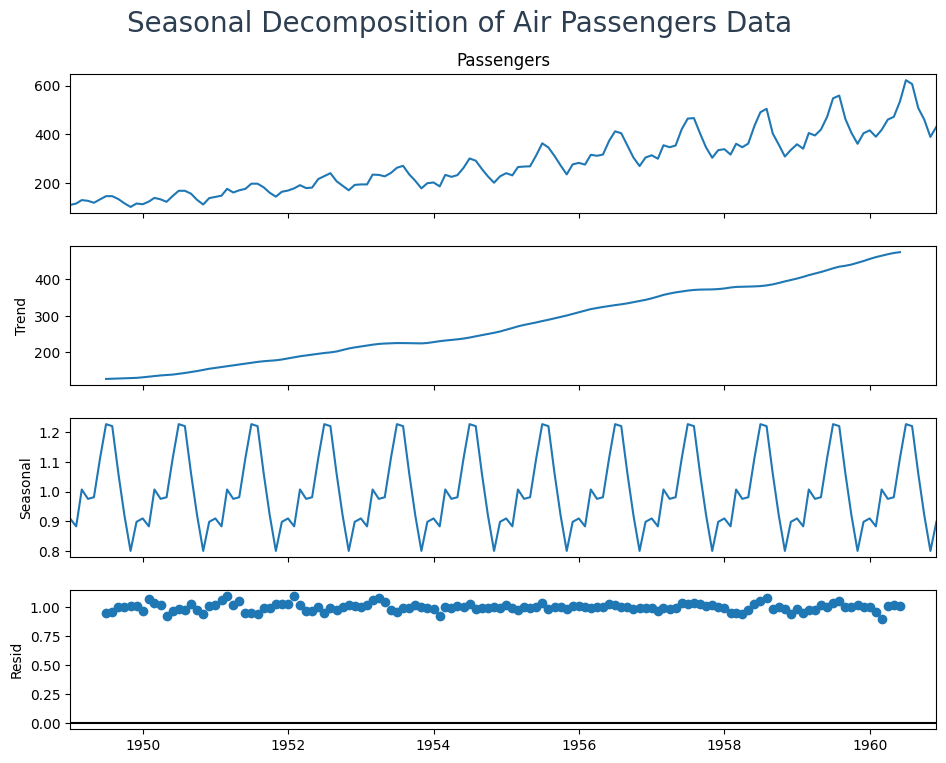

In [6]:
# Seasonal Decomposition Plot
result = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
fig = result.plot()
fig.set_size_inches(10, 8)
fig.subplots_adjust(top=0.9)
fig.suptitle('Seasonal Decomposition of Air Passengers Data', fontsize=20, color='#2c3e50')
plt.show()

In [7]:
# Augmented Dickey-Fuller Test
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    adf_test_result = adfuller(timeseries, autolag='AIC')
    adf_output = pd.Series(adf_test_result[:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_test_result[4].items():
        adf_output[f'Critical Value ({key})'] = value
    print(adf_output)
    return adf_output

# Call the function
adf_results = adf_test(data['Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


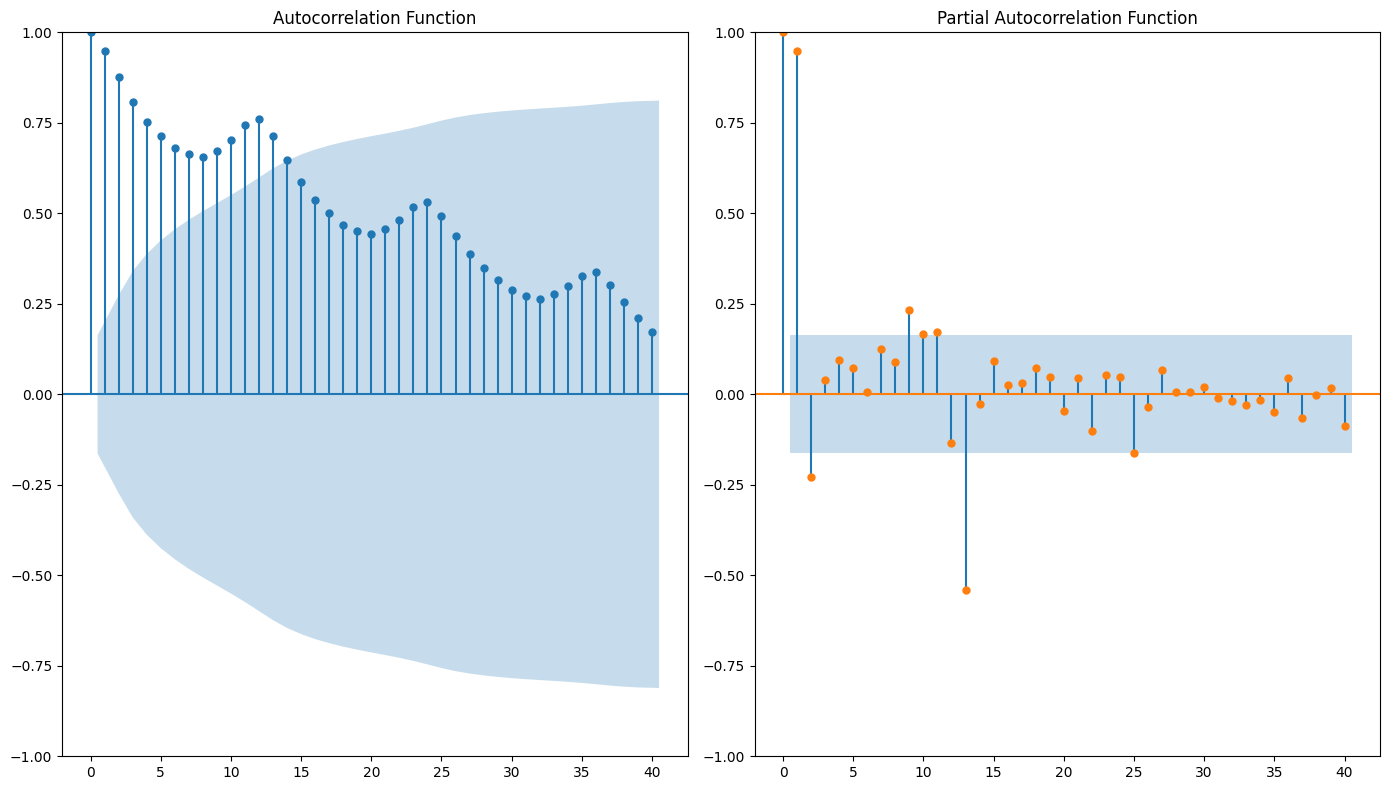

In [8]:
# Autocorrelation and Partial Autocorrelation Plots
def plot_acf_pacf(timeseries, lags=40):
    plt.figure(figsize=(14, 8))

    # ACF plot
    plt.subplot(121)
    plot_acf(timeseries, lags=lags, ax=plt.gca(), color='#1f77b4')
    plt.title('Autocorrelation Function')

    # PACF plot
    plt.subplot(122)
    plot_pacf(timeseries, lags=lags, ax=plt.gca(), color='#ff7f0e')
    plt.title('Partial Autocorrelation Function')

    plt.tight_layout()
    plt.show()

# Call the function
plot_acf_pacf(data['Passengers'])

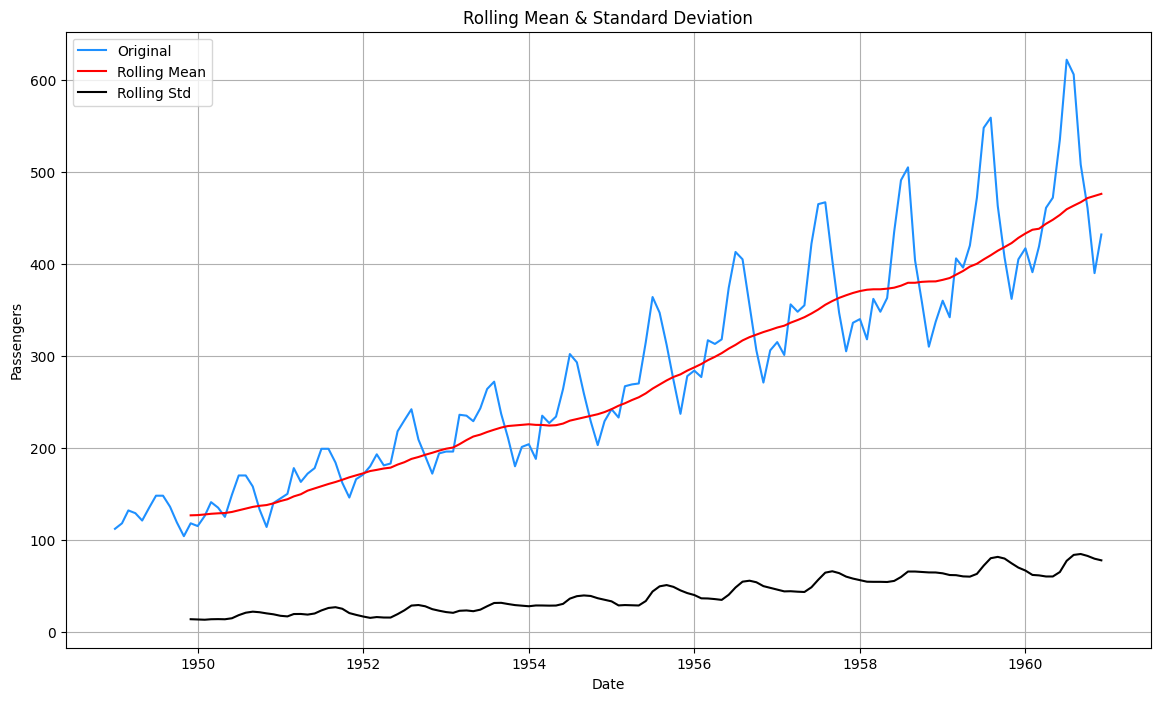

In [9]:
# Rolling Statistics Plot
def plot_rolling_statistics(timeseries, window=12):
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    plt.figure(figsize=(14, 8))
    plt.plot(timeseries, color='dodgerblue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.grid(True)
    plt.show()

# Call the function
plot_rolling_statistics(data['Passengers'])

# Split Data

In [10]:
# Splitting the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Display the sizes of the datasets
print("Training Data:")
display(train_data.head())
display(train_data.tail())

print("\nTesting Data:")
display(test_data.head())
display(test_data.tail())

Training Data:


,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


,Passengers
Date,
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491



Testing Data:


,Passengers
Date,
1958-08-01,505
1958-09-01,404
1958-10-01,359
1958-11-01,310
1958-12-01,337


,Passengers
Date,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


# Differencing

In [11]:
# Original Data
display(train_data.head())
display(train_data.tail())

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


,Passengers
Date,
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491


In [12]:
# Difference the data
train_diff = train_data.diff()
display(train_diff.head())
display(train_diff.tail())

,Passengers
Date,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


,Passengers
Date,
1958-03-01,44.0
1958-04-01,-14.0
1958-05-01,15.0
1958-06-01,72.0
1958-07-01,56.0


## Inverse Differencing

In [13]:
# Inverse differencing
first_value = train_data.iloc[0]
train_inversed = first_value + train_diff.cumsum()

# Set the first value
train_inversed.iloc[0] = first_value

# Display the inversed data
display(train_inversed.head())
display(train_inversed.tail())

,Passengers
Date,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


,Passengers
Date,
1958-03-01,362.0
1958-04-01,348.0
1958-05-01,363.0
1958-06-01,435.0
1958-07-01,491.0


# Missing Data

## Drop Data

In [14]:
# Drop missing values
train_diff_drop = train_diff.dropna()
display(train_diff_drop.head())
display(train_diff_drop.tail())

,Passengers
Date,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


,Passengers
Date,
1958-03-01,44.0
1958-04-01,-14.0
1958-05-01,15.0
1958-06-01,72.0
1958-07-01,56.0


## Backward Fill

In [15]:
# Backward fill (cannot forward fill for first value)
train_bfill = train_diff.bfill()
display(train_bfill.head())
display(train_bfill.tail())

,Passengers
Date,
1949-01-01,6.0
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


,Passengers
Date,
1958-03-01,44.0
1958-04-01,-14.0
1958-05-01,15.0
1958-06-01,72.0
1958-07-01,56.0


## Mean Fill

In [16]:
# Fill with the mean
train_filled = train_diff.fillna(train_diff.mean())
display(train_filled.head())
display(train_filled.tail())

,Passengers
Date,
1949-01-01,3.324561
1949-02-01,6.000000
1949-03-01,14.000000
1949-04-01,-3.000000
1949-05-01,-8.000000


,Passengers
Date,
1958-03-01,44.0
1958-04-01,-14.0
1958-05-01,15.0
1958-06-01,72.0
1958-07-01,56.0


## Interpolation

In [17]:
# Fill using interpolation
train_interpolate = train_diff.interpolate(method='linear', limit_direction='backward')
display(train_interpolate.head())
display(train_interpolate.tail())

,Passengers
Date,
1949-01-01,6.0
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


,Passengers
Date,
1958-03-01,44.0
1958-04-01,-14.0
1958-05-01,15.0
1958-06-01,72.0
1958-07-01,56.0


## Lookahead Mean

In [18]:
# Make the last value a missing value
train_diff_new = train_diff.copy()
train_diff_new.iloc[-1] = np.nan
display(train_diff_new.head())
display(train_diff_new.tail())

,Passengers
Date,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


,Passengers
Date,
1958-03-01,44.0
1958-04-01,-14.0
1958-05-01,15.0
1958-06-01,72.0
1958-07-01,NaN


In [19]:
# Function to fill missing values using a custom strategy
def lookahead_mean_backfill(series, lookahead_window_size, lookback_window_size, handle_last='last_known'):
    """
    Fills missing values with the mean of the next 'lookahead_window_size' steps ahead.
    If the missing value is the last in the series, handles it based on the 'handle_last' argument.

    Parameters:
    - series (pd.Series or pd.DataFrame): The data to be filled. Can be a single column or multiple columns.
    - lookahead_window_size (int): The number of steps ahead to consider for the lookahead mean.
    - lookback_window_size (int): The number of steps behind to consider for the lookback mean when needed.
    - handle_last (str): Strategy for handling the last missing value. Options:
        - 'last_known': Fills with the last known value before the NaN.
        - 'mean': Fills with the global mean of the series/column.
        - 'lookback_mean': Fills with the mean of the previous 'lookback_window_size' steps behind.

    Returns:
    - pd.Series or pd.DataFrame: The filled series or DataFrame.
    """
    # Create a copy of the series to avoid modifying the original data
    filled_series = series.copy()

    # If the input is a DataFrame, iterate over each column
    # If the input is a Series, treat it as a single column
    for col in filled_series.columns if isinstance(filled_series, pd.DataFrame) else [filled_series.name]:
        # Work with the current column's data
        if isinstance(filled_series, pd.DataFrame):
            col_series = filled_series[col]
        else:
            col_series = filled_series

        # Iterate over each element in the column/series
        for i in range(len(col_series)):
            # Check if the current element is NaN
            if pd.isna(col_series.iloc[i]):
                # Handle the edge case where the NaN is the last value in the series
                if i == len(col_series) - 1:
                    if handle_last == 'last_known':
                        # Fill with the last known value before the NaN
                        col_series.iloc[i] = col_series.iloc[:i].ffill().iloc[-1]
                    elif handle_last == 'mean':
                        # Fill with the global mean of the series/column
                        col_series.iloc[i] = col_series.mean()
                    elif handle_last == 'lookback_mean':
                        # Fill with the mean of the previous 'lookback_window_size' steps behind
                        steps_behind = col_series.iloc[max(0, i-lookback_window_size):i]
                        col_series.iloc[i] = steps_behind.mean()
                    continue  # Skip the rest of the loop for the last value

                # For normal cases (not the last value), calculate the lookahead mean
                steps_ahead = col_series.iloc[i+1:i+1+lookahead_window_size]

                if not steps_ahead.empty and steps_ahead.count() > 0:
                    # If there are enough values ahead, calculate the mean of these values
                    mean_value = steps_ahead.mean()
                else:
                    # If there are not enough values ahead, calculate the mean of the previous 'lookback_window_size' steps
                    steps_behind = col_series.iloc[max(0, i-lookback_window_size):i]
                    mean_value = steps_behind.mean()

                # Fill the current NaN with the calculated mean value
                col_series.iloc[i] = mean_value

    # Return the filled series or DataFrame
    return filled_series

# Apply the function
lookahead_window_size = 3
lookback_window_size = 5
train_filled = lookahead_mean_backfill(train_diff_new, lookahead_window_size, lookback_window_size, handle_last='lookback_mean')

# Display the result
display(train_filled.head())
display(train_filled.tail())

,Passengers
Date,
1949-01-01,5.666667
1949-02-01,6.000000
1949-03-01,14.000000
1949-04-01,-3.000000
1949-05-01,-8.000000


,Passengers
Date,
1958-03-01,44.0
1958-04-01,-14.0
1958-05-01,15.0
1958-06-01,72.0
1958-07-01,19.0


In [20]:
# Verify lookahead mean
window_size = 3
lookahead_df = train_diff_new.iloc[1:window_size+1]
display(lookahead_df)
print("\nLookahead mean:")
display(lookahead_df.values.mean())

,Passengers
Date,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0



Lookahead mean:


5.666666666666667

In [21]:
# Verify lookback mean
window_size = 5
lookback_df = train_diff_new.iloc[-window_size-1:-1]
display(lookback_df)
print("\nLookback mean:")
display(lookback_df.values.mean())

,Passengers
Date,
1958-02-01,-22.0
1958-03-01,44.0
1958-04-01,-14.0
1958-05-01,15.0
1958-06-01,72.0



Lookback mean:


19.0

## Lookback Mean

In [22]:
# Function to fill missing values using a custom strategy
def lookback_mean_forwardfill(series, lookback_window_size, lookahead_window_size, handle_first='next_known'):
    """
    Fills missing values with the mean of the previous 'lookback_window_size' steps behind.
    If the missing value is the first in the series, handles it based on the 'handle_first' argument.

    Parameters:
    - series (pd.Series or pd.DataFrame): The data to be filled. Can be a single column or multiple columns.
    - lookback_window_size (int): The number of steps behind to consider for the lookback mean.
    - lookahead_window_size (int): The number of steps ahead to consider for the lookahead mean when needed.
    - handle_first (str): Strategy for handling the first missing value. Options:
        - 'next_known': Fills with the next non-missing value.
        - 'mean': Fills with the global mean of the series/column.
        - 'lookahead_mean': Fills with the mean of the next 'lookahead_window_size' steps ahead.

    Returns:
    - pd.Series or pd.DataFrame: The filled series or DataFrame.
    """
    # Create a copy of the series to avoid modifying the original data
    filled_series = series.copy()

    # If the input is a DataFrame, iterate over each column
    # If the input is a Series, treat it as a single column
    for col in filled_series.columns if isinstance(filled_series, pd.DataFrame) else [filled_series.name]:
        # Work with the current column's data
        if isinstance(filled_series, pd.DataFrame):
            col_series = filled_series[col]
        else:
            col_series = filled_series

        # Iterate over each element in the column/series
        for i in range(len(col_series)):
            # Check if the current element is NaN
            if pd.isna(col_series.iloc[i]):
                # Handle the edge case where the NaN is the first value in the series
                if i == 0:
                    if handle_first == 'next_known':
                        # Fill with the next known value after the NaN
                        col_series.iloc[i] = col_series.iloc[i+1:].bfill().iloc[0]
                    elif handle_first == 'mean':
                        # Fill with the global mean of the series/column
                        col_series.iloc[i] = col_series.mean()
                    elif handle_first == 'lookahead_mean':
                        # Fill with the mean of the next 'lookahead_window_size' steps ahead
                        steps_ahead = col_series.iloc[i+1:i+1+lookahead_window_size]
                        col_series.iloc[i] = steps_ahead.mean()
                    continue  # Skip the rest of the loop for the first value

                # For normal cases (not the first value), calculate the lookback mean
                steps_behind = col_series.iloc[max(0, i-lookback_window_size):i]

                if not steps_behind.empty and steps_behind.count() > 0:
                    # If there are enough values behind, calculate the mean of these values
                    mean_value = steps_behind.mean()
                else:
                    # If there are not enough values behind, calculate the mean of the next 'lookahead_window_size' steps
                    steps_ahead = col_series.iloc[i+1:i+1+lookahead_window_size]
                    mean_value = steps_ahead.mean()

                # Fill the current NaN with the calculated mean value
                col_series.iloc[i] = mean_value

    # Return the filled series or DataFrame
    return filled_series

# Apply the function
lookback_window_size = 3
lookahead_window_size = 5
train_filled = lookback_mean_forwardfill(train_diff_new, lookback_window_size, lookahead_window_size, handle_first='lookahead_mean')

# Display the result
display(train_filled.head())
display(train_filled.tail())

,Passengers
Date,
1949-01-01,4.6
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


,Passengers
Date,
1958-03-01,44.000000
1958-04-01,-14.000000
1958-05-01,15.000000
1958-06-01,72.000000
1958-07-01,24.333333


In [23]:
# Verify lookahead mean
window_size = 5
lookahead_df = train_diff_new.iloc[1:window_size+1]
display(lookahead_df)
print("\nLookahead mean:")
display(lookahead_df.values.mean())

,Passengers
Date,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0



Lookahead mean:


4.6

In [24]:
# Verify lookback mean
window_size = 3
lookback_df = train_diff_new.iloc[-window_size-1:-1]
display(lookback_df)
print("\nLookback mean:")
display(lookback_df.values.mean())

,Passengers
Date,
1958-04-01,-14.0
1958-05-01,15.0
1958-06-01,72.0



Lookback mean:


24.333333333333332

## Imputation

In [25]:
# Initialize IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Transform the data and then convert back to DataFrame
train_diff_filled = pd.DataFrame(imputer.fit_transform(train_diff_new), index=train_diff_new.index, columns=train_diff_new.columns)

# Display the result
display(train_diff_filled.head())
display(train_diff_filled.tail())

,Passengers
Date,
1949-01-01,2.858407
1949-02-01,6.000000
1949-03-01,14.000000
1949-04-01,-3.000000
1949-05-01,-8.000000


,Passengers
Date,
1958-03-01,44.000000
1958-04-01,-14.000000
1958-05-01,15.000000
1958-06-01,72.000000
1958-07-01,2.858407


## MissingHandler

In [26]:
# Class for handling missing data in a variety of ways
class MissingHandler:
    def __init__(self, strategy='nan', interpolate_method='linear', limit_direction='both', interpolate_kwargs=None,
                 iterative_imputer_kwargs=None, lookahead_window_size=3, lookback_window_size=3,
                 handle_last='last_known', handle_first='next_known', fill_value=0):
        """
        Initialize the MissingValueHandler class with the desired strategy and parameters.

        Parameters:
        - strategy (str): The strategy to use for handling missing values. Options:
            - 'bfill': Use .bfill().ffill() to fill missing values.
            - 'ffill': Use .ffill().bfill() to fill missing values.
            - 'mean': Use the global mean of the series to fill missing values.
            - 'interpolate': Use the interpolate method to fill missing values, defaulting to 'linear'.
            - 'iterative_imputer': Use IterativeImputer to fill missing values.
            - 'lookahead_mean': Use the lookahead_mean_backfill() function to fill missing values.
            - 'lookback_mean': Use the lookback_mean_forwardfill() function to fill missing values.
            - 'zero': Fill missing values with zero.
            - 'pad': Fill missing values with a specified number, defaulting to zero.
            - 'nan': Leave the missing values as NaN.
            - 'drop': Remove the missing values outright.
        - interpolate_method (str): The method to use for the interpolate strategy. Default is 'linear'.
        - limit_direction (str): The direction to limit the interpolation. Default is 'both'.
        - interpolate_kwargs (dict): A dictionary of keyword arguments to pass to the interpolate function.
        - iterative_imputer_kwargs (dict): A dictionary of keyword arguments to pass to IterativeImputer.
        - lookahead_window_size (int): The window size to use for the lookahead mean strategy.
        - lookback_window_size (int): The window size to use for the lookback mean strategy.
        - handle_last (str): How to handle the last missing value in the series for the lookahead_mean strategy.
        - handle_first (str): How to handle the first missing value in the series for the lookback_mean strategy.
        - fill_value (float): The value to use for filling when the strategy is 'pad'. Default is 0.
        """
        self.strategy = strategy
        self.interpolate_method = interpolate_method
        self.limit_direction = limit_direction
        self.interpolate_kwargs = interpolate_kwargs if interpolate_kwargs else {}
        self.iterative_imputer_kwargs = iterative_imputer_kwargs if iterative_imputer_kwargs else {}
        self.lookahead_window_size = lookahead_window_size
        self.lookback_window_size = lookback_window_size
        self.handle_last = handle_last
        self.handle_first = handle_first
        self.fill_value = fill_value

    def iterative_imputer(self, series):
        imputer = IterativeImputer(**self.iterative_imputer_kwargs)
        # If input is a Series, reshape for imputation and then reshape back
        if isinstance(series, pd.Series):
            series_filled = pd.Series(imputer.fit_transform(series.values.reshape(-1, 1)).flatten(), index=series.index)
        else:  # DataFrame
            series_filled = pd.DataFrame(imputer.fit_transform(series), index=series.index, columns=series.columns)
        return series_filled

    def lookahead_mean_backfill(self, series):
        """
        Use the lookahead_mean_backfill function to fill missing values with the mean of the next steps.
        """
        return lookahead_mean_backfill(series, self.lookahead_window_size, self.lookback_window_size, self.handle_last)

    def lookback_mean_forwardfill(self, series):
        """
        Use the lookback_mean_forwardfill function to fill missing values with the mean of the previous steps.
        """
        return lookback_mean_forwardfill(series, self.lookback_window_size, self.lookahead_window_size, self.handle_first)

    def handle(self, series):
        """
        Apply the selected strategy to handle missing values in the provided series.

        Parameters:
        - series (pd.Series or pd.DataFrame): The data with missing values to handle.

        Returns:
        - pd.Series or pd.DataFrame: The series or DataFrame with missing values handled as per the strategy.
        """
        if self.strategy == 'bfill':
            return series.bfill().ffill()
        elif self.strategy == 'ffill':
            return series.ffill().bfill()
        elif self.strategy == 'mean':
            return series.fillna(series.mean())
        elif self.strategy == 'interpolate':
            return series.interpolate(method=self.interpolate_method, limit_direction=self.limit_direction, **self.interpolate_kwargs)
        elif self.strategy == 'iterative_imputer':
            return self.iterative_imputer(series)
        elif self.strategy == 'lookahead_mean':
            return self.lookahead_mean_backfill(series)
        elif self.strategy == 'lookback_mean':
            return self.lookback_mean_forwardfill(series)
        elif self.strategy == 'zero':
            return series.fillna(0)
        elif self.strategy == 'pad':
            return series.fillna(self.fill_value)
        elif self.strategy == 'nan':
            return series
        elif self.strategy == 'drop':
            return series.dropna()
        else:
            raise ValueError(f"Unknown strategy: {self.strategy}")

In [27]:
# Initialize the handler with a specific strategy
handler = MissingHandler(strategy='interpolate', interpolate_method='linear')

# Apply the handler to the data
train_filled = handler.handle(train_diff_new)

# Display the result
display(train_filled.head())
display(train_filled.tail())

,Passengers
Date,
1949-01-01,6.0
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


,Passengers
Date,
1958-03-01,44.0
1958-04-01,-14.0
1958-05-01,15.0
1958-06-01,72.0
1958-07-01,72.0


In [28]:
# Initialize the handler with a specific strategy
handler = MissingHandler(strategy='iterative_imputer', iterative_imputer_kwargs={'max_iter': 10, 'random_state': 42})

# Apply the handler to the data
train_filled = handler.handle(train_diff_new)

# Display the result
display(train_filled.head())
display(train_filled.tail())

,Passengers
Date,
1949-01-01,2.858407
1949-02-01,6.000000
1949-03-01,14.000000
1949-04-01,-3.000000
1949-05-01,-8.000000


,Passengers
Date,
1958-03-01,44.000000
1958-04-01,-14.000000
1958-05-01,15.000000
1958-06-01,72.000000
1958-07-01,2.858407


In [29]:
# Initialize the handler with a specific strategy
handler = MissingHandler(strategy='lookahead_mean', lookahead_window_size=3, lookback_window_size=3, handle_last='lookback_mean')

# Apply the handler to the data
train_filled = handler.handle(train_diff_new)

# Display the result
display(train_filled.head())
display(train_filled.tail())

,Passengers
Date,
1949-01-01,5.666667
1949-02-01,6.000000
1949-03-01,14.000000
1949-04-01,-3.000000
1949-05-01,-8.000000


,Passengers
Date,
1958-03-01,44.000000
1958-04-01,-14.000000
1958-05-01,15.000000
1958-06-01,72.000000
1958-07-01,24.333333
